# Understanding the Problem Statement and Business Case

- We live in a world where we are constantly bombarded with social media feeds, tweets, and news articles.
- This huge data could be leveraged to predict people sentiment towards a particular company or stock.
- Natural language processing (NLP) works by converting words (text) into numbers. These number are then used to train an AI/ML model to make predictions.
- AI/ML based sentiment analysis models, can be used to understand the sentiment from public tweets, which could be used as a factor while making a buy/sell decision of securities.

# Import Libraries/Datasets and Performed Exploratory Data Analysis

In [ ]:
pip install gensim

     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
     --------------------------------------- 0.1/23.3 MB 648.1 kB/s eta 0:00:36
     ---------------------------------------- 0.2/23.3 MB 1.6 MB/s eta 0:00:15
      --------------------------------------- 0.5/23.3 MB 2.3 MB/s eta 0:00:10
     - -------------------------------------- 0.7/23.3 MB 3.1 MB/s eta 0:00:08
     - -------------------------------------- 1.0/23.3 MB 3.4 MB/s eta 0:00:07
     - -------------------------------------- 1.0/23.3 MB 3.4 MB/s eta 0:00:07
     - -------------------------------------- 1.0/23.3 MB 3.4 MB/s eta 0:00:07
     -- ------------------------------------- 1.3/23.3 MB 3.0 MB/s eta 0:00:08
     -- ------------------------------------- 1.5/23.3 MB 3.1 MB/s eta 0:00:07
     --- ------------------------------------ 1.8/23.3 MB 3.4 MB/s eta 0:00:07
     --- ------------------------------------ 2.0/23.3 MB 3.5 MB/

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [714 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\gensim
  copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
  creating build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\csvcorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\dictionary.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  c

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from transformers import pipeline

In [2]:
# Loaded the stock news data
stock_df = pd.read_csv("/content/stock_sentiment.csv")

In [3]:
# Let's view the dataset
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [4]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [5]:
# checked for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

<Axes: ylabel='count'>

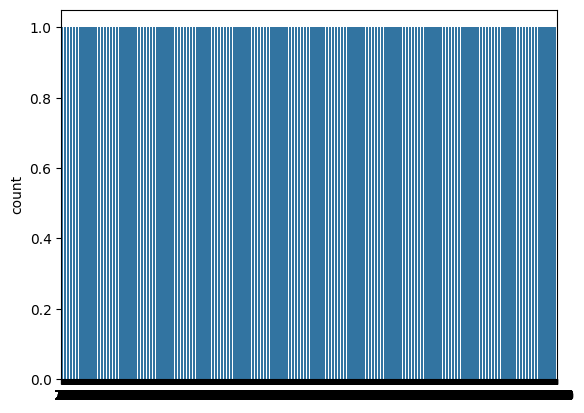

In [6]:
sns.countplot(stock_df['Sentiment'])

In [7]:
# Found the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

# Performed Data Cleaning (Removed Punctuations from Text)

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [10]:
Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'

In [11]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [12]:
# Joined the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [13]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [14]:
# Let's remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [15]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [16]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [17]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

# Removed Punctuations using a Different Method

In [18]:
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Joined the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

# Performed Data Cleaning (Removed Stopwords)

In [19]:
# downloaded stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# Obtained additional stopwords from nltk
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [21]:
# Removed stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)

    return result

In [22]:
# Applied pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [23]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [24]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [25]:
# Joined the words into a string
#stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [26]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [27]:
# Obtained additional stopwords from nltk
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [28]:
# Removed stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 2 and token not in stop_words:
            result.append(token)

    return result

In [29]:
# Applied pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [30]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [31]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'prev',
 'posts']

In [32]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[oi]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


# Plotted Wordcloud

In [33]:
# Joined the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

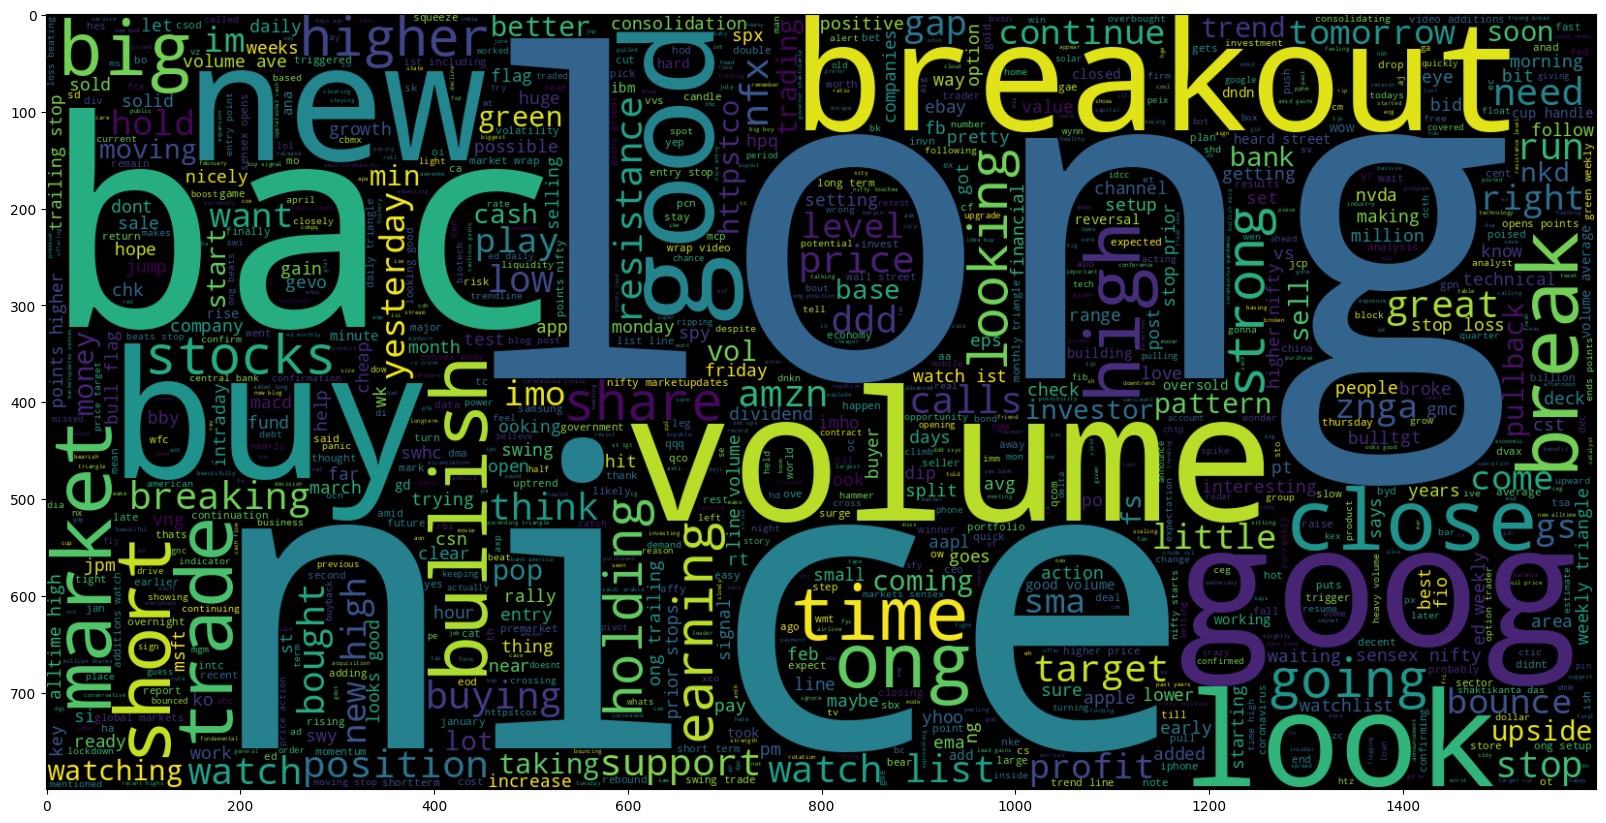

In [34]:
# Plotted the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

# Visualized the Wordcloud for Tweets that have Negative Sentiment

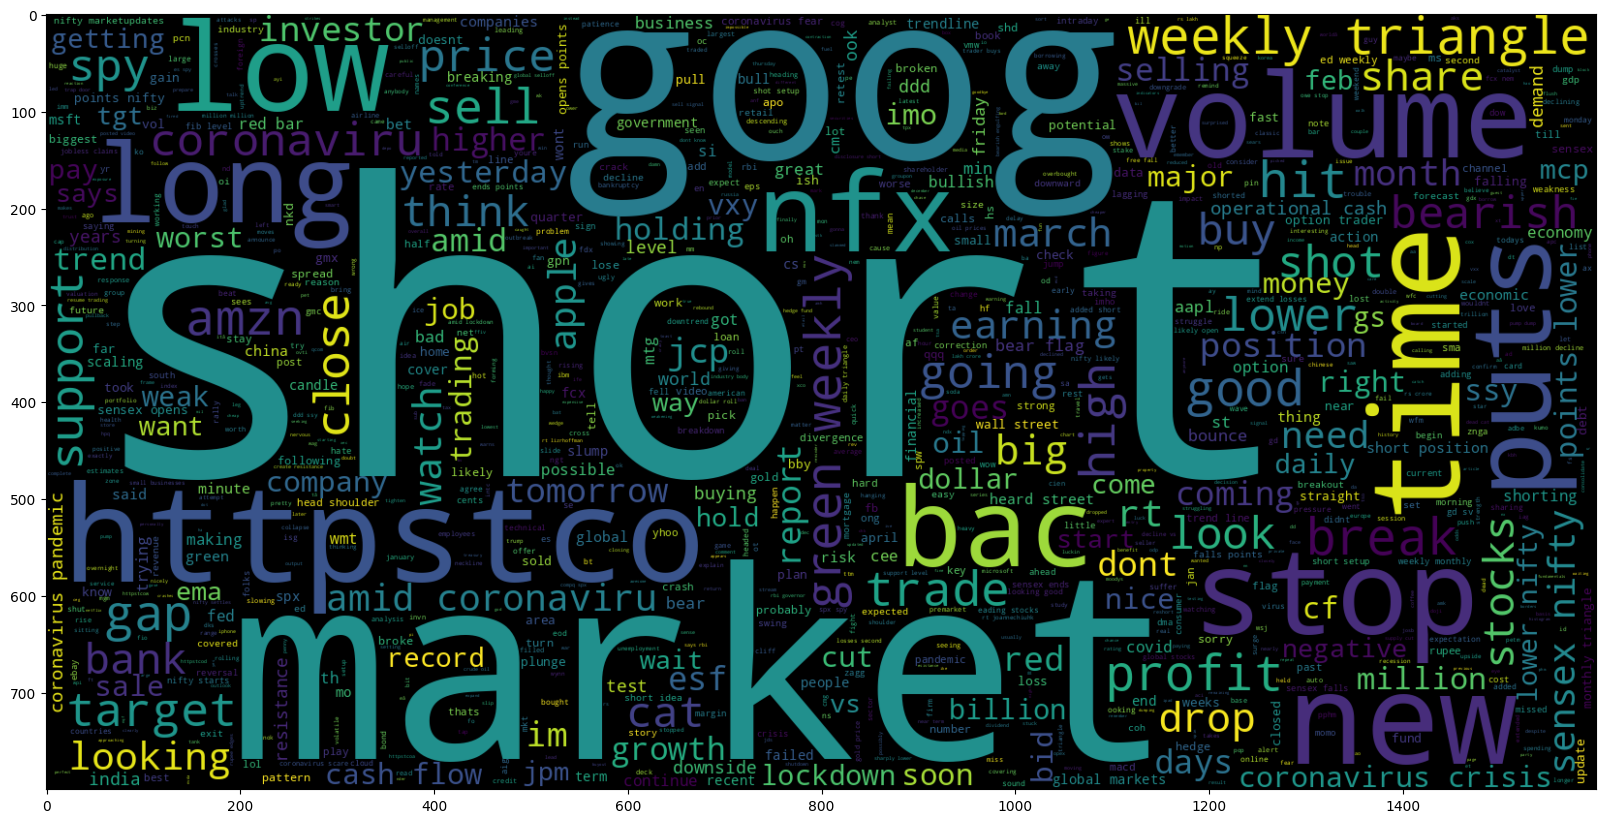

In [35]:
# Plotted the word cloud for text that is negative
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

# Visualized Cleaned Datasets

In [36]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm...",id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[oi],oi
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof...",gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz aj trade method method prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'prev', 'posts']


In [39]:
# Obtained the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 22


In [40]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 8,
 1,
 1,
 1,
 7,
 13,
 8,
 4,
 9,
 14,
 8,
 8,
 10,
 6,
 12,
 8,
 12,
 4,
 6,
 4,
 1,
 5,
 3,
 10,
 3,
 4,
 9,
 6,
 6,
 8,
 7,
 3,
 10,
 10,
 4,
 8,
 11,
 9,
 9,
 3,
 9,
 6,
 5,
 10,
 8,
 4,
 8,
 9,
 11,
 9,
 7,
 2,
 16,
 11,
 9,
 8,
 2,
 15,
 7,
 10,
 4,
 17,
 7,
 7,
 6,
 5,
 6,
 7,
 9,
 4,
 8,
 13,
 19,
 7,
 8,
 7,
 3,
 9,
 5,
 4,
 9,
 9,
 17,
 4,
 9,
 6,
 6,
 2,
 1,
 7,
 10,
 3,
 7,
 7,
 7,
 8,
 1,
 4,
 8,
 4,
 14,
 9,
 10,
 9,
 18,
 6,
 7,
 12,
 10,
 7,
 3,
 4,
 10,
 10,
 7,
 7,
 8,
 5,
 5,
 7,
 10,
 13,
 2,
 4,
 8,
 15,
 15,
 10,
 3,
 1,
 1,
 3,
 7,
 12,
 11,
 10,
 9,
 12,
 10,
 11,
 14,
 6,
 7,
 9,
 11,
 9,
 6,
 12,
 10,
 4,
 8,
 8,
 12,
 11,
 7,
 12,
 4,
 5,
 3,
 7,
 3,
 5,
 9,
 4,
 6,
 10,
 5,
 15,
 7,
 5,
 5,
 9,
 9,
 8,
 8,
 2,
 9,
 9,
 8,
 11,
 9,
 8,
 6,
 3,
 6,
 5,
 8,
 9,
 4,
 6,
 7,
 4,
 4,
 7,
 10,
 9,
 8,
 10,
 9,
 10,
 9,
 12,
 9,
 6,
 5,
 3,
 12,
 13,
 7,
 10,
 9,
 14,
 10,
 6,
 6,
 7,
 10,
 10,
 3,
 3,
 2,
 10,
 3,
 9,
 8,
 15,
 10,
 9,
 14,
 6,
 8,
 2,


In [41]:
# Plotted the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

<Axes: ylabel='count'>

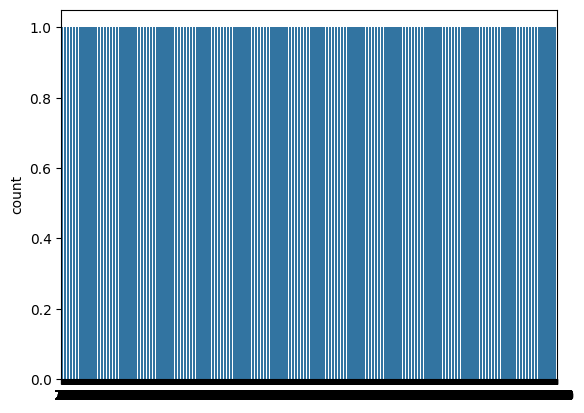

In [42]:
# Plotted the word count
sns.countplot(stock_df['Sentiment'])

# Prepared the Data by Tokenizing and Padding

## Tokenizer

- Tokenizer allows us to vectorize text corpus.
- Tokenization works by turning each text into a sequence of integers.

In [43]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm...",id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[oi],oi
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof...",gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [44]:
# Obtained the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [45]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'id',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'oi',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'im',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'like',
 'setup',
 'worries',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'time',
 'shall',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'cheap',
 'great',
 'video',
 'maykiljil',
 'posted',
 'agre

In [46]:
# Obtained the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9487

In [47]:
# Splitted the data into test and train
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [48]:
X_train.shape

(5211,)

In [49]:
X_test.shape

(580,)

In [50]:
X_train

2261    [goog, break, old, high, tomorrow, gave, green...
2326                                 [dish, break, watch]
2023                [abt, bullish, setup, breaking, base]
4563                                   [short, ms, small]
2691     [en, fuego, fmx, eww, mexico, international, ko]
                              ...                        
3259                                  [ces, long, target]
3711    [bac, volume, calls, huge, months, big, coming...
2736    [htz, reasonably, tight, consolidation, far, w...
2250                [green, weekly, triangle, pbyscaling]
3479              [hd, patience, pays, broke, new, highs]
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [51]:
# Created a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [52]:
train_sequences

[[7, 24, 454, 46, 64, 1547, 33, 284, 61, 26, 1947],
 [1948, 24, 9],
 [960, 32, 110, 65, 210],
 [1, 324, 118],
 [487, 1949, 3726, 3727, 1950, 1548, 759],
 [429, 760, 33, 126, 761, 20],
 [580, 127, 16, 164, 134, 3728, 961, 842],
 [51, 382, 24, 101, 53, 84],
 [762, 25],
 [763, 242, 346, 52, 14, 166],
 [680, 18, 1101, 32, 3729, 843, 962, 625, 1951, 626, 3730],
 [963, 3731],
 [1, 105, 408, 3732, 178, 1952, 3733, 3734, 16, 324],
 [347, 764, 627, 488, 365],
 [51, 167, 235, 73, 135, 1102, 178, 3735, 348, 844, 964],
 [26, 122, 3736, 27, 430, 4, 21],
 [211, 581, 681, 628, 308, 1314, 842, 349, 1314, 3737, 383, 1103],
 [17, 23, 1104, 431, 349, 455],
 [1953, 845, 1954, 285, 309, 28, 1549, 113],
 [256, 3738, 965, 81, 1105, 136, 225, 2536, 3739],
 [1550, 432, 2537, 1551, 2538, 765, 350, 3740, 3741, 3742],
 [2539, 3743, 2540, 846, 537, 257, 682, 3744, 3745],
 [8, 538, 766],
 [92, 202, 22, 3746, 456, 95],
 [3747, 42, 683, 195, 966, 3, 196, 325, 1955, 326],
 [1106, 767, 3748, 1956],
 [129, 684],
 [433, 

In [53]:
test_sequences

[[448, 531, 7580, 448, 531, 7580, 143],
 [6744, 123, 1051, 4, 432, 1553],
 [15, 650, 207, 595, 9, 443, 380, 632, 3432, 5093, 5796],
 [118, 516, 14, 181, 112, 6, 5665, 266, 225, 44, 1344],
 [1138],
 [114, 296],
 [1832, 101, 4, 343, 1048, 68, 1593],
 [7039, 1222, 1515, 2868, 2399, 3625, 2556, 8615, 6608, 3472, 1454, 1200],
 [7, 149, 4, 47],
 [901, 545, 968, 3470, 871, 704, 1354, 1767],
 [671, 2490, 13, 331],
 [1401, 58, 96, 645, 255, 11, 807],
 [514, 287, 446, 370, 349, 446, 417, 124, 44],
 [583, 850, 289, 79, 39, 31, 153, 29, 2818],
 [1235, 1235, 7, 1518, 1471, 34, 54, 3],
 [157, 5, 297],
 [49, 337, 86, 829, 216, 291, 171, 149, 212, 3, 8609],
 [860, 1065, 248, 164, 148, 21, 74],
 [63, 1869, 3100, 1775, 765, 457, 3719, 680],
 [7, 1856, 2752, 1069, 21, 46, 6, 1348, 21, 69, 12, 680],
 [1056, 32, 281, 8513, 694, 2448, 205, 199, 21, 1470],
 [459],
 [157, 90, 7466, 1004, 3664],
 [8766, 351, 10, 96, 268, 2601, 3492, 220],
 [7, 70, 2700, 82, 59, 6040, 1044],
 [46, 1174, 893, 838, 2042, 225, 111

In [54]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 2326    [dish, break, watch]
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [1948, 24, 9]


In [55]:
# Added padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [56]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [   7   24  454   46   64 1547   33  284   61   26 1947    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [1948   24    9    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [960  32 110  65 210   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [57]:
# Converted the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [58]:
y_train_cat.shape

(5211, 2)

In [59]:
y_test_cat.shape

(580, 2)

In [60]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [61]:
# Added padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [62]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [   7   24  454   46   64 1547   33  284   61   26 1947    0    0    0
    0]
The padded encoding for document: 2  is: [1948   24    9    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [960  32 110  65 210   0   0   0   0   0   0   0   0   0   0]


In [63]:
# Converted the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [64]:
y_train_cat.shape

(5211, 2)

In [65]:
y_test_cat.shape

(580, 2)

In [66]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Understanding the Theory and Intuition behind Recurrent Neural Networks and Long Short Term Memory Networks (LSTM)

## Introduction to Recurrent Neural Networks (RNN)

- Feedforward Neural Networks (vanilla networks) map a fixed size input (such as image) to a fixed size output (classes or probabilities).
- A drawback in Feedforward networks is that they do not have any time dependency or memory effect.
- A RNN is a type of ANN that is designed to take temporal dimension into consideration by having a memory (internal state) (feedback loop).
- A RNN contains a temporal loop in which the hidden layer not only gives an output but it feeds itself as well.
- An extra dimension is added which is time!
- RNN can recall what happened in the previous time stamp so it works great with sequence of text.

## Long Short Term Memory Networks

- LSTM contains gates that can allow or block information from passing by.
- Gates consist of a sigmoid neural net layer along with a pointwise multiplication operation.
+ Sigmoid output ranges from 0 to 1:
    - 0 = Don't allow any data to flow
    - 1 = Allow everything to flow!
    
# Build a Custom-Based Deep Neural Network to Perform Sentiment Analysis

## Embedding Layer

- Embedding layers learn low-dimensional continuous representation of discrete input variables.
- For example, let say we have 100000 unique values in our data and want to train the model with these data. Though we can use these as such, it would require more resources to train. With embedding layer, you can specify the number of low-dimensional feature that you would need to represent the input data, in this case let's take the value to be 200.
- Now, what happens is embedding layer learns the way to represent 100000 variables with 200 variables, similar to Principal Component Analysis (PCA) or Autoencoder.
- This in-turn helps the subsequent layers to learn more effectively.

In [67]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4857344   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5677954 (21.66 MB)
Trainable params: 5677954 (21.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 38s 271ms/step - loss: 0.5943 - acc: 0.6900 - val_loss: 0.5003 - val_acc: 0.7546
Epoch 2/2
131/131 [==============================] - 28s 212ms/step - loss: 0.3019 - acc: 0.8800 - val_loss: 0.5213 - val_acc: 0.7603


# Trained the Model using Different Embedding Output Dimension

In [69]:
#model = Sequential()

# embedding layer
#model.add(Embedding(total_words, output_dim = 256))

# Bi-Directional RNN and LSTM
#model.add(Bidirectional(LSTM(128)))

# Dense layers
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(1,activation = 'sigmoid'))
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
#model.summary()

# Assessed Trained Model Performance

In [70]:
# Made prediction
pred = model.predict(padded_test)

19/19 [==============================] - 1s 38ms/step


In [71]:
# Made prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [72]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [73]:
# Accuracy score on text data
accuracy = accuracy_score(original, prediction)
accuracy

0.7862068965517242

<Axes: >

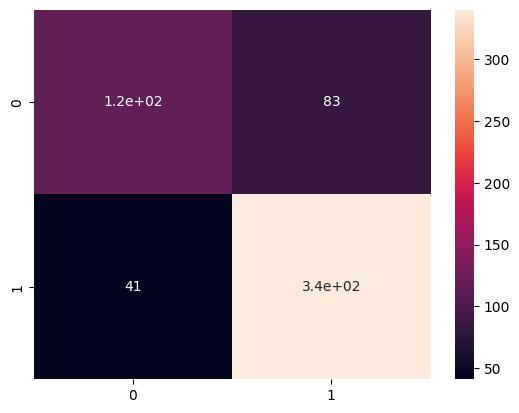

In [74]:
# Plotted the confusion matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

In [ ]:
# Used pipeline from transformer to perform specific task.
# Mentioned sentiment analysis as task and passed in the string to it, to get the results
# We can specify tasks like topic modeling, Q and A, text summarization here.

#nlp = pipeline('sentiment-analysis')

# Made prediction on the test data
#pred = nlp(list(X_test))

# Since predicted value is a dictionary, get the label from the dict
#prediction = []
#for i in pred:
#  prediction.append(i['label'])

# print the final results
#for i in range(len(prediction[:3])):
#  print("\n\nNews :\n\n", df[df.combined == X_test.values[i]].Text.item(), "\n\nOriginal value :\n\n",
#      category[df[df.combined == X_test.values[i]].Sentiment.item()], "\n\nPredicted value :\n\n", prediction[i], "\n\n\n")